In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [5]:
df.shape

(1000, 3)

In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
360,7.24,33.0,0
176,7.72,30.0,1
471,5.48,18.0,0
516,6.83,28.0,0
476,6.83,34.0,0


<AxesSubplot: xlabel='placement_exam_marks', ylabel='Count'>

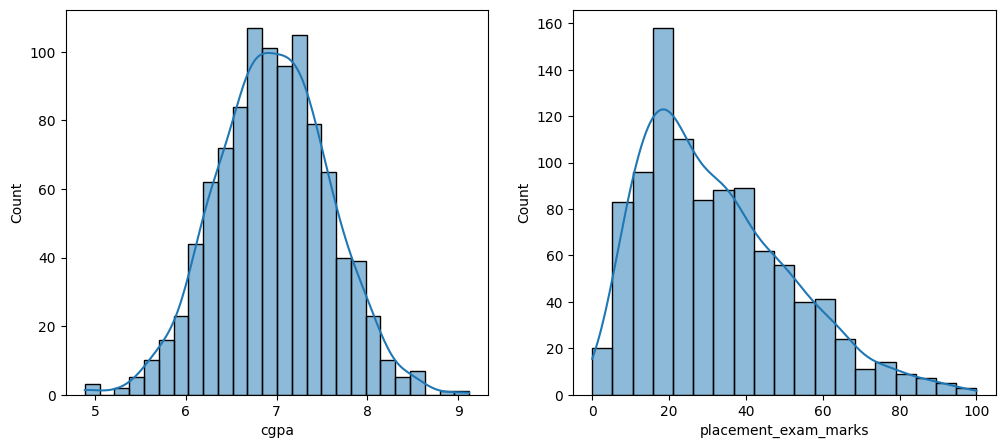

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde = True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde = True)


In [13]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [15]:
print("Mean value of the cgpa", df['cgpa'].mean())
print("Std value of the cgpa", df['cgpa'].std())
print("Min value of the cgpa", df['cgpa'].min())
print("Max value of the cgpa", df['cgpa'].max())

Mean value of the cgpa 6.96124
Std value of the cgpa 0.6158978751323896
Min value of the cgpa 4.89
Max value of the cgpa 9.12


In [16]:
# finding the boundary of values
print('Highest allowed', df['cgpa'].mean() + df['cgpa'].std()*3)
print('Lowest allowed', df['cgpa'].mean() - df['cgpa'].std()*3)

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [17]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# **Trimming**

In [19]:
new_df = df[(df['cgpa'] > 5.11) & (df['cgpa'] < 8.80)]

In [20]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [21]:
# Approach 2

# Calculating the Zscore

df['cgpa_z-score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [22]:
df.head(5)

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [28]:
# all the entries with z-score outside -3 to 3

df[(df['cgpa_z-score'] > 3) | (df['cgpa_z-score'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


**Trimming**

In [31]:
new_df = df[(df['cgpa_z-score'] < 3) & (df['cgpa_z-score'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


**Capping**

In [32]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [37]:
print(upper_limit, lower_limit, sep = "\n")

8.808933625397168
5.113546374602832


# **np.where(x,y,z)**

Here **x** is a **boolean statement** and **y** is the value that will be used to **replace if x is true**
and **z** is the value that will be used to **replace instead**

In [39]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [40]:
df.shape

(1000, 4)

In [41]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64